[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://drive.google.com/file/d/18jUrrmltn_euwULe_hC2O27H__p7zebF/view?usp=sharing)

# Student's t-Test

- Intro
- Setup / Import
- Data load:
- Application
- Conclusion
- References / Acknowledgements

## Intro

Student’s t-tests are parametric tests based on the Student’s or t-distribution. Student’s distribution is named in honor of William Sealy Gosset (1876–1937), who first determined it in 1908. Gosset, “one of the most original minds in contemporary science” (Fisher 1939), was one of the best Oxford graduates in chemistry and mathematics in his generation. In 1899, he took up a job as a brewer at Arthur Guinness Son & Co, Ltd in Dublin, Ireland. Working for the Guinness brewery, he was interested in quality control based on small samples in various stages of the production process. Since Guinness prohibited its employees from publishing any papers to prevent disclosure of confidential information, Gosset had published his work under the pseudonym “Student” (the other possible pseudonym he was offered by the managing director La Touche was “Pupil,” see Box 1987,  p. 49), and his identity was not known for some time after the publication of his most famous achievements, so the distribution was named Student’s or t-distribution, leaving his name less well known than his important results in statistics. His, now, famous paper “The Probable Error of a Mean” published in Biometrika in 1908, where he introduced the t-test (initially he called it the z-test), was essentially ignored by most statisticians for more than 2 decades, since the “statistical community” was not interested in small samples (“only naughty brewers take n so small,” Karl Pearson writing to Gosset, September 17, 1912, quoted by E.S. Pearson 1939, p. 218). It was only R. Fisher who appreciated the importance of Gosset’s small-sample work, and who reconfigured and extended it to two independent samples, correlation and regression, and provided correct number of degrees of freedom. “It took the genius and drive of a Fisher to give Student’s work general currency” (Zabel 2008, p. 6); “The importance of 1908 article is due to what Fisher found there, not what Gosset placed there”

#### Things 

- Student t-Test
- Student t-Test dependent samples
- Student t-Test independent samples
- Application with real world dataset

## Pseudo Understanding Of t-Test

The test works by checking the means from two samples to see if they are significantly different from each other. It does this by calculating the standard error in the difference between means, which can be interpreted to see how likely the difference is, if the two samples have the same mean (the null hypothesis).

![alt text](https://a8h2w5y7.rocketcdn.me/wp-content/uploads/2020/02/students-normal-t-768x461.png)

The t statistic calculated by the test can be interpreted by comparing it to critical values from the t-distribution. The critical value can be calculated using the degrees of freedom and a significance level with the percent point function (PPF).

We can interpret the statistic value in a two-tailed test, meaning that if we reject the null hypothesis, it could be because the first mean is smaller or greater than the second mean. To do this, we can calculate the absolute value of the test statistic and compare it to the positive (right tailed) critical value, as follows:

- If abs(t-statistic) <= critical value: Accept null hypothesis that the means are equal.
- If abs(t-statistic) > critical value: Reject the null hypothesis that the means are equal.

We can also retrieve the cumulative probability of observing the absolute value of the t-statistic using the cumulative distribution function (CDF) of the t-distribution in order to calculate a p-value. The p-value can then be compared to a chosen significance level (alpha) such as 0.05 to determine if the null hypothesis can be rejected:

- If p > alpha: Accept null hypothesis that the means are equal.
- If p <= alpha: Reject null hypothesis that the means are equal.

In working with the means of the samples, the test assumes that both samples were drawn from a Gaussian distribution. The test also assumes that the samples have the same variance, and the same size, although there are corrections to the test if these assumptions do not hold.


There are two main versions of Student’s t-test:

- Independent Samples. The case where the two samples are unrelated.
- Dependent Samples. The case where the samples are related, such as repeated measures on the same population. Also called a paired test.

Both the independent and the dependent Student’s t-tests are available in Python via the ttest_ind() and ttest_rel() SciPy functions respectively.


### How is it difference than Normal Distribution?

The normal distribution is used when the population distribution of data is assumed normal. It is characterized by the mean and the standard deviation of the data. A sample of the population is used to estimate the mean and standard deviation.

The t statistic is an estimate of the standard error of the mean of the population or how well known is the mean based on the sample size.

The decision to use one or the other requires a clear, logical statement and argument to establish whether to use the t-distribution or the normal distribution. Use of either assumes a normally distributed population.

in addition to all t-distribution will give better result than normal distribution whenever we have less number of data point(<30 in general).
![alt text](https://financetrain.com/assets/t-dist1.gif)



## Setup / Dependencies

In [15]:
! pip install ipywidgets
! jupyter nbextension enable --py widgetsnbextension
! pip install chart_studio

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


## Import


In [0]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import pandas as pd
from sklearn.datasets import load_boston
import numpy as np
import scipy
from scipy.stats import t
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
%matplotlib inline
sns.set_context('talk')
sns.set_style("darkgrid")

## Data load

- Patients with Liver disease have been continuously increasing because of excessive consumption of alcohol, inhale of harmful gases, intake of contaminated food, pickles and drugs. This dataset was used to evaluate prediction algorithms in an effort to reduce burden on doctors.

### Hypothesis
- H0 : there is no significant difference of Albumin and Globulin Ratio between patient with liver disease and no liver disease
- H1 : there is significant difference of Albumin and Globulin Ratio between patient with liver disease and no liver disease


In [18]:
!mkdir Dataset
!cd Dataset && wget https://raw.githubusercontent.com/jacked97/Interactive-Statistics-Notebooks-1/student-t_test/Student-T-Test/Dataset/indian_liver_patient.csv

mkdir: cannot create directory ‘Dataset’: File exists
--2020-04-14 20:15:53--  https://raw.githubusercontent.com/jacked97/Interactive-Statistics-Notebooks-1/student-t_test/Student-T-Test/Dataset/indian_liver_patient.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23347 (23K) [text/plain]
Saving to: ‘indian_liver_patient.csv.1’

indian_liver_patien 100%[===================>]  22.80K  --.-KB/s    in 0.01s   

2020-04-14 20:15:53 (1.83 MB/s) - ‘indian_liver_patient.csv.1’ saved [23347/23347]



In [0]:
path = 'Dataset/indian_liver_patient.csv'
data = pd.read_csv(path)

In [0]:
df = data
df = df.dropna()

`interact` [documentation](https://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html)

In [21]:
@interact
def show_articles_more_than(column=df.columns, x=20):
    return df[column].loc[:x].hist()

interactive(children=(Dropdown(description='column', options=('Age', 'Gender', 'Total_Bilirubin', 'Direct_Bili…

In [22]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


## Application

### Indepdent Test

In [0]:
liver_patient = (df.loc[df['Dataset'] == 1])['Albumin_and_Globulin_Ratio']
non_liver_patient = (df.loc[df['Dataset'] == 2])['Albumin_and_Globulin_Ratio']

In [24]:
lp_mean = liver_patient.mean()
nlp_mean = non_liver_patient.mean();

lp_variance = liver_patient.var()
nlp_variance = non_liver_patient.var();

lp_n = liver_patient.size
nlp_n = non_liver_patient.size

alpha = 0.05
degree_of_freedom = nlp_n + lp_n - 2
critical_value = t.ppf(1.0 - alpha, degree_of_freedom)

print("Liver Patients: Mean: {0}, Variance: {1}, Size: {2}".format(lp_mean, lp_variance, lp_n))
print("Non-liver Patients: Mean: {0}, Variance: {1}, Size: {2}".format(nlp_mean, nlp_variance, nlp_n))

Liver Patients: Mean: 0.9141787439613527, Variance: 0.10637547402650555, Size: 414
Non-liver Patients: Mean: 1.0295757575757576, Variance: 0.08251384331116045, Size: 165


In [25]:
t_value = ( nlp_mean - lp_mean ) / np.sqrt( (nlp_variance / nlp_n ) + (lp_variance / lp_n) )
	
# calculate the p-value
print("Calculated T-Value: {0}, Critical Value: {1}".format(t_value, critical_value))

Calculated T-Value: 4.194094111425738, Critical Value: 1.6474987455986252


In [26]:
# interpret via critical value
if abs(t_value) <= critical_value:
    print('Accept null hypothesis, there is no significant difference of Albumin and Globulin Ratio between patient with liver disease and no liver disease')
else:
    print('Reject the null hypothesis')


Reject the null hypothesis


### Dependent Test

Example: using your current dataset but only with liver disease, the data of Albumin and Globulin Ratio. Give a case like this: the medical doctor give a new medicine to the patient and want to know whether it is effective or not. After 1 month, he check again Albumin and Globulin Ratio of all patients. (then just add random number to complete this case)
- H0: there is no significant difference
-H1 : there is significance difference


In [0]:
# draw random samples from same data set 
liver_patient = (df.loc[df['Dataset'] == 1])['Albumin_and_Globulin_Ratio']
N = liver_patient.size
before_treatmeent = np.array(liver_patient)
after_treatmeent = np.array([round(np.random.uniform(min(before_treatmeent), max(before_treatmeent)), 2) for i in range(N)])


In [29]:
before_treatmeent_mean = before_treatmeent.mean()
after_treatmeent_mean = after_treatmeent.mean();

alpha = 0.05
degree_of_freedom = N - 1
critical_value = t.ppf(1.0 - alpha, degree_of_freedom)

print("Liver Patients A: Mean: {0}".format(before_treatmeent_mean))
print("Liver Patients B: Mean: {0}".format(after_treatmeent_mean))

Liver Patients A: Mean: 0.9141787439613527
Liver Patients B: Mean: 1.5038405797101446


In [0]:
d1 = sum([(before_treatmeent[i] - after_treatmeent[i])**2 for i in range(N)])
# sum difference between observations
d2 = sum([before_treatmeent[i] - after_treatmeent[i] for i in range(N)])
# standard deviation of the difference between means
sd = np.sqrt((d1 - (d2**2 / N)) / (N - 1))
# standard error of the difference between the means
sed = sd / np.sqrt(N)
# calculate the t statistic
t_stat = (before_treatmeent_mean - after_treatmeent_mean) / sed

In [31]:
if abs(t_stat) <= critical_value:
	print('Accept null hypothesis, that the new medicine is effective')
else:
	print('Reject the null hypothesis, that the new medicine is not effective')

Reject the null hypothesis, that the new medicine is not effective


## Paired T-Test 

In [51]:
np.random.seed(11)

before= stats.norm.rvs(scale=30, loc=250, size=100)

after = before + stats.norm.rvs(scale=5, loc=-1.25, size=100)

weight_df = pd.DataFrame({"weight_before":before,
                          "weight_after":after,
                          "weight_change":after-before})

weight_df.describe()             # Check a summary of the data

,weight_before,weight_after,weight_change
count,100.000000,100.000000,100.000000
mean,250.345546,249.115171,-1.230375
std,28.132539,28.422183,4.783696
min,170.400443,165.913930,-11.495286
25%,230.421042,229.148236,-4.046211
50%,250.830805,251.134089,-1.413463
75%,270.637145,268.927258,1.738673
max,314.700233,316.720357,9.759282


In [52]:
stats.ttest_rel(a = before,
                b = after)

Ttest_relResult(statistic=2.5720175998568284, pvalue=0.011596444318439857)

### Type I and Type II Error
The result of a statistical hypothesis test and the corresponding decision of whether to reject or accept the null hypothesis is not infallible. A test provides evidence for or against the null hypothesis and then you decide whether to accept or reject it based on that evidence, but the evidence may lack the strength to arrive at the correct conclusion. Incorrect conclusions made from hypothesis tests fall in one of two categories: type I error and type II error.

Type I error describes a situation where you reject the null hypothesis when it is actually true. This type of error is also known as a "false positive" or "false hit". The type 1 error rate is equal to the significance level α, so setting a higher confidence level (and therefore lower alpha) reduces the chances of getting a false positive.

Type II error describes a situation where you fail to reject the null hypothesis when it is actually false. Type II error is also known as a "false negative" or "miss". The higher your confidence level, the more likely you are to make a type II error.

Let's investigate these errors with a plot:


Text(0, 0.02, 'Type 2 Error')

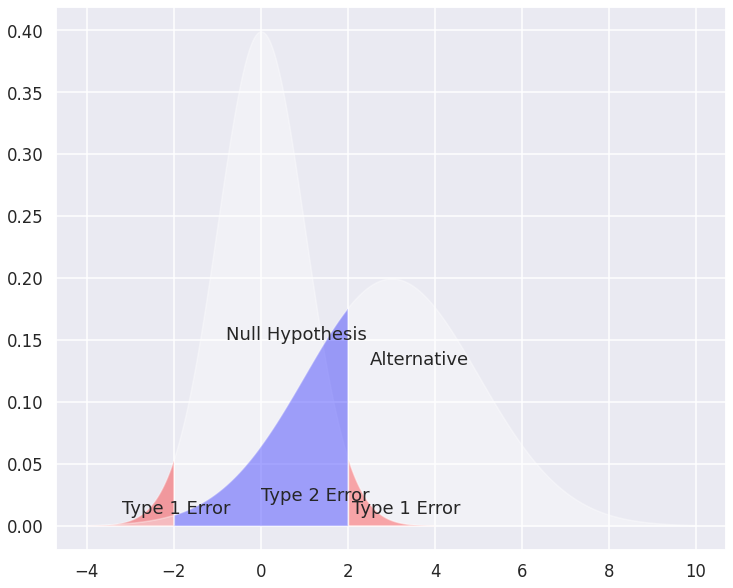

In [54]:
plt.figure(figsize=(12,10))

plt.fill_between(x=np.arange(-4,-2,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-2,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(-2,2,0.01), 
                 y1= stats.norm.pdf(np.arange(-2,2,0.01)) ,
                 facecolor='white',
                 alpha=0.35)

plt.fill_between(x=np.arange(2,4,0.01), 
                 y1= stats.norm.pdf(np.arange(2,4,0.01)) ,
                 facecolor='red',
                 alpha=0.5)

plt.fill_between(x=np.arange(-4,-2,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-2,0.01),loc=3, scale=2) ,
                 facecolor='white',
                 alpha=0.35)

plt.fill_between(x=np.arange(-2,2,0.01), 
                 y1= stats.norm.pdf(np.arange(-2,2,0.01),loc=3, scale=2) ,
                 facecolor='blue',
                 alpha=0.35)

plt.fill_between(x=np.arange(2,10,0.01), 
                 y1= stats.norm.pdf(np.arange(2,10,0.01),loc=3, scale=2),
                 facecolor='white',
                 alpha=0.35)

plt.text(x=-0.8, y=0.15, s= "Null Hypothesis")
plt.text(x=2.5, y=0.13, s= "Alternative")
plt.text(x=2.1, y=0.01, s= "Type 1 Error")
plt.text(x=-3.2, y=0.01, s= "Type 1 Error")
plt.text(x=0, y=0.02, s= "Type 2 Error")

In the plot above, the red areas indicate type I errors assuming the alternative hypothesis is not different from the null for a two-sided test with a 95% confidence level.


The blue area represents type II errors that occur when the alternative hypothesis is different from the null, as shown by the distribution on the right. Note that the Type II error rate is the area under the alternative distribution within the quantiles determined by the null distribution and the confidence level.

Futher reading reference [7]

## Conclusion

The student's t test can let you know if there is a significant difference in the means of the two sample groups and disprove the null hypothesis. Like all statistical tests, it cannot prove anything, as there is always a chance of experimental error occurring. But the test can support a hypothesis.

However, it is still useful for measuring small sample populations and determining if there is a significant difference between the groups.

## References / Acknowledgements

1. Student’s t-Tests (Damir Kalpić, Nikica Hlupić, Miodrag Lovrić)
2. http://www.sthda.com/english/wiki/t-test-formula
3. https://en.wikipedia.org/wiki/Student%27s_t-test
4. https://www.youtube.com/watch?time_continue=3&v=fKZA5waOJ0U&feature=emb_title
5. https://www.researchgate.net/post/What_is_the_difference_between_the_t-Distribution_and_Normal_Distribution
6. https://explorable.com/students-t-test
7. http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-24.html


